In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict, Literal

In [2]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str

In [17]:
def show_equation(state:QuadState):

    equation = f"{state['a']}X2 + {state['b']}X + {state['c']} = 0"

    return {'equation':equation}

In [4]:
def calculate_discriminant(state:QuadState):

    d = state['b']**2 - 4*state['a']*state['c']

    return {'discriminant':d}

In [9]:
def real_roots(state: QuadState):

    root1 = (-state['b'] + state['discriminant']**0.5) / (2*state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5) / (2*state['a'])

    result = f"Real roots: {root1} and {root2}"

    return {'result':result}

In [10]:
def repeated_roots(state: QuadState):

    root = -state['b']/2*state['a']

    result = f"Repeated root: {root}"

    return {'result':result}

In [11]:
def no_real_roots(state: QuadState):

    result = "No real roots"

    return {'result':result}

In [12]:
def check_condition(state: QuadState) -> Literal['real_roots','repeated_roots','no_real_roots']:
    
    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

In [13]:
graph = StateGraph(QuadState)

# add node

graph.add_node('show_equation',show_equation)
graph.add_node('calculate_discriminant',calculate_discriminant)

graph.add_node('real_roots',real_roots)
graph.add_node('repeated_roots',repeated_roots)
graph.add_node('no_real_roots',no_real_roots)

# add edges

graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_discriminant')

graph.add_conditional_edges('calculate_discriminant',check_condition)
graph.add_edge('real_roots',END)
graph.add_edge('repeated_roots',END)
graph.add_edge('no_real_roots',END)

workflow = graph.compile()

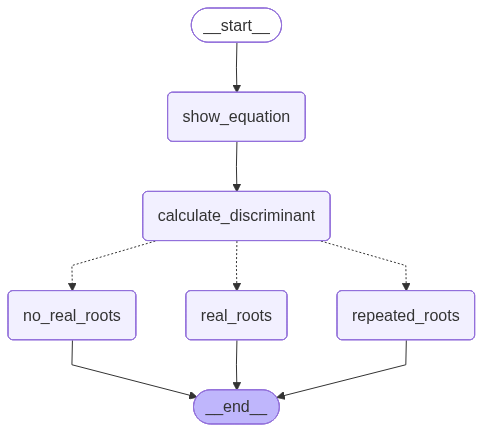

In [14]:
workflow

In [ ]:
initial_state = {
    'a':4 ,
    'b':2,
    'c':4
}

workflow.invoke(initial_state)

{'a': 4,
 'b': 2,
 'c': 4,
 'equation': '4X2  2X  4 = 0',
 'discriminant': -60,
 'result': 'No real roots'}